# Задание на взаимную проверку по разделу 2.3.

##План:
### 1. Знакомство с блокнотом, рассмотренным в видеолекции по разделу 2.3. 
### 2. Задания по подбору гиперпараметров моделей





## 1. Знакомство с блокнотом, рассмотренным в видеолекции по разделу 2.3. - Решение задачи прогнозирования стоимости объекта недвижимости 

In [124]:
import pandas as pd 

In [125]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [126]:
import pandas as pd
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1k_eZu0gSJY7tECz-F_wyqrVV7Dw1k_Wl',index_col=0, decimal=',')
data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         21613 non-null  int64  
 1   Спальни              21613 non-null  int64  
 2   Ванные               21613 non-null  float64
 3   Жилая площадь        21613 non-null  int64  
 4   Общая площадь        21613 non-null  int64  
 5   Количество этажей    21613 non-null  float64
 6   Вид на воду          21613 non-null  int64  
 7   Просмотрены ранее    21613 non-null  int64  
 8   Состояние            21613 non-null  int64  
 9   Оценка риелтора      21613 non-null  int64  
 10  Площадь без подвала  21613 non-null  int64  
 11  Площадь подвала      21613 non-null  int64  
 12  Год постройки        21613 non-null  int64  
 13  Год реновации        21613 non-null  int64  
 14  Широта               21613 non-null  float64
 15  Долгота              21613 non-null 

In [128]:
data.tail(10)

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
15119,865000,5,2.50,3190,8160,2.0,0,0,3,9,3190,0,2014,0,47.7246,-122.363
15120,575000,4,1.75,1630,5750,1.0,0,0,3,7,1160,470,1947,0,47.5674,-122.384
15121,399950,3,1.75,2450,15001,1.0,0,0,3,7,1980,470,1989,0,47.6957,-121.913
15122,175000,3,1.75,1910,17003,1.5,0,0,4,8,1910,0,1963,0,47.3095,-122.283
15123,315000,4,2.75,2200,8580,1.0,0,0,3,8,1860,340,1991,0,47.2950,-122.370
15124,930000,4,4.25,5710,24663,2.0,0,0,3,11,5710,0,2007,0,47.3065,-122.158
15125,400000,3,1.50,1950,4473,1.0,0,0,4,6,1530,420,1914,0,47.7094,-122.228
15126,1580000,3,2.00,3620,14250,2.0,0,0,3,8,3220,400,2007,0,47.5767,-122.225
15127,339900,4,2.50,2340,9748,1.0,0,1,3,8,1610,730,1981,0,47.3363,-122.331
15128,430000,3,1.50,1450,7316,1.0,0,0,3,7,1450,0,1961,0,47.7725,-122.349


In [129]:
data.shape

(21613, 16)

In [130]:
target_name = 'Целевая.Цена'

In [131]:
data['Целевая.Цена']

0         260000
1         734500
2         325000
3        1990000
4         315000
          ...   
15124     930000
15125     400000
15126    1580000
15127     339900
15128     430000
Name: Целевая.Цена, Length: 21613, dtype: int64

In [132]:
y = data[target_name]
y

0         260000
1         734500
2         325000
3        1990000
4         315000
          ...   
15124     930000
15125     400000
15126    1580000
15127     339900
15128     430000
Name: Целевая.Цена, Length: 21613, dtype: int64

In [133]:
X = data.drop(target_name, axis=1)

In [134]:
X.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [135]:
X.shape

(21613, 15)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [138]:
X_train.shape

(15129, 15)

In [139]:
from sklearn import linear_model

In [140]:
linear_regression_model = linear_model.LinearRegression()  
linear_regression_model                                     

LinearRegression()

In [141]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [142]:
test_predictions = linear_regression_model.predict(X_test)
test_predictions

array([627818.52058236, 495289.49150906, 221685.52662731, ...,
       628575.44407558, 540213.08167742, 377874.52256492])

In [143]:
%matplotlib inline 

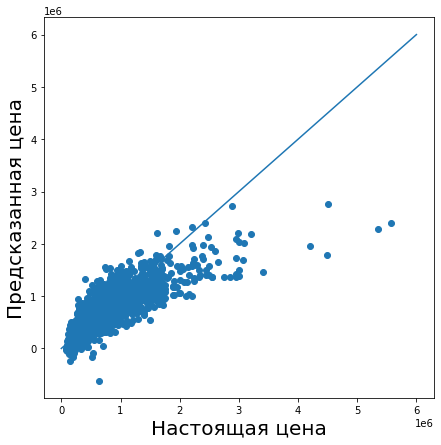

In [144]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

##Оценка качества регрессионной модели


##Mean Squared Error (MSE) 
Средняя квадратическая ошибка


In [145]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, test_predictions)

In [146]:
MSE

39953471460.57705

##Root Mean Squared Error (RMSE) 
Корень средней квадратической ошибки


In [147]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, test_predictions,squared=False)


In [148]:
RMSE

199883.6448051142

##Mean Absolute Error (MAE )
Средняя абсолютная ошибка

In [149]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error (y_test, test_predictions)

In [150]:
MAE

126096.9146317437

##R-Squared (R²)
Коэффициент детерминации

In [151]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, test_predictions)

In [152]:
R2

0.6883059316455129

In [153]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, MSE:{2:7.2f},r2_score{3:5.2f} для Модели линейной регрессии".format(MAE,RMSE,MSE,R2))


MAE: 126096.91, RMSE: 199883.64, MSE:39953471460.58,r2_score 0.69 для Модели линейной регрессии


#Решающее дерево (Decision Tree)



In [154]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
X = X_train
y = y_train

In [156]:
model = DecisionTreeRegressor( random_state=13, max_depth=3, min_samples_leaf= 100)
model.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=100, random_state=13)

In [157]:
dt_predictions = model.predict(X_test)

In [158]:
MAE = mean_absolute_error (y_test, dt_predictions)
MAE

135682.14904155402

##Как выглядит построеное дерево?

In [159]:
from sklearn.tree import export_graphviz
import subprocess
import pydot
from sklearn.tree import export_graphviz  
from IPython.display import Image

In [160]:
export_graphviz(model, out_file='tree', 
               rounded = True, proportion = True, 
                precision = 2, filled = True)

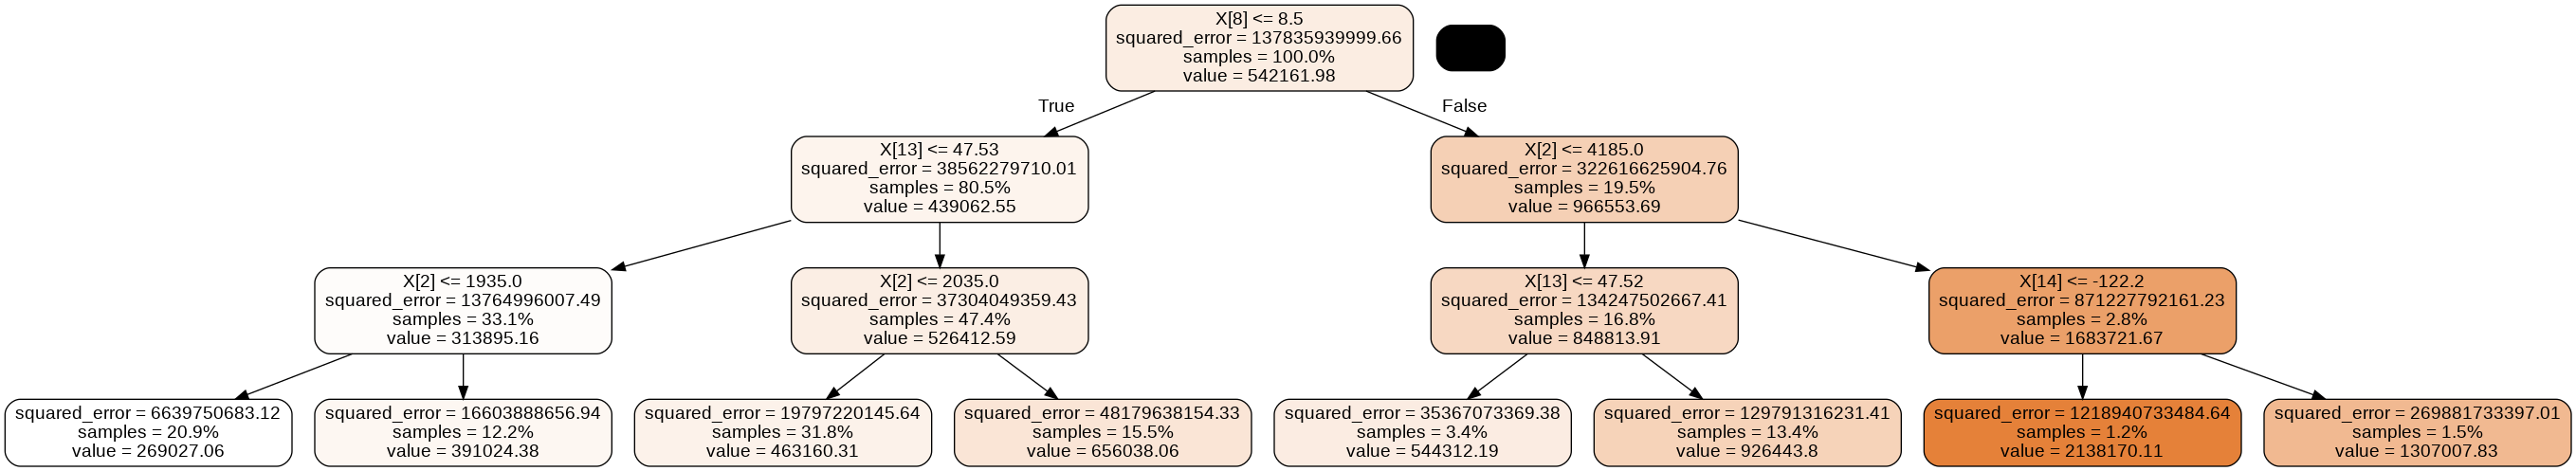

In [161]:
(graph,) = pydot.graph_from_dot_file('tree')
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
grid_searcher = GridSearchCV(DecisionTreeRegressor(random_state=13,),
                             param_grid={'max_depth': [3, 4, 5, 6, 7],
                                         'min_samples_leaf': range(10, 50),
                                        },
                                         cv=5)

In [164]:
grid_searcher.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=13),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': range(10, 50)})

In [165]:
grid_searcher.best_params_

{'max_depth': 7, 'min_samples_leaf': 10}

In [166]:
best_dt = grid_searcher.predict(X_test) 

In [167]:
MAE = mean_absolute_error (y_test, best_dt)
MAE

100664.6328345529

#Случайный лес (Random Forest)

In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
rf = RandomForestRegressor(n_estimators=100)

In [170]:
rf.fit(X,y)

RandomForestRegressor()

In [171]:
rf_pred = rf.predict(X_test)

In [172]:
MAE = mean_absolute_error(y_test, rf_pred)
MAE

70373.52629955421

In [173]:
import matplotlib.pyplot as plt

In [174]:
M = []
for n in range(1, 300, 10):
  rf = RandomForestRegressor(n_estimators=n, max_features=0.4)
  rf.fit(X, y)
  M.append(mean_absolute_error(y_test, rf.predict(X_test)))

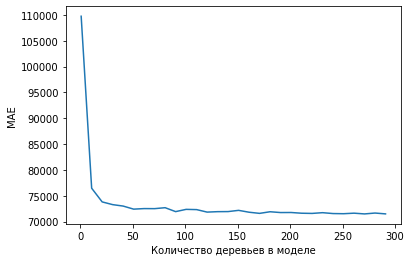

In [175]:
plt.plot(range(1, 300, 10), M)
plt.xlabel('Количество деревьев в моделе')
plt.ylabel('MAE')
plt.show()

In [176]:
M = []
for i in range(1, 20):
  rf = RandomForestRegressor(n_estimators = 300, max_depth= i)
  rf.fit(X, y)
  M.append(mean_absolute_error(y_test, rf.predict(X_test)))

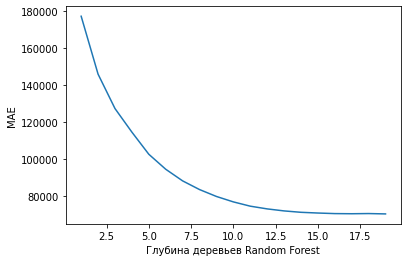

In [177]:
plt.plot(range(1, 20), M)
plt.xlabel('Глубина деревьев Random Forest')
plt.ylabel('MAE')
plt.show()

In [178]:
rf2 = RandomForestRegressor(n_estimators=300, max_features= 9)

In [179]:
rf2.fit(X,y)

RandomForestRegressor(max_features=9, n_estimators=300)

In [180]:
rf_pred2 = rf2.predict(X_test)

##MAE Random Forest

In [181]:
MAE = mean_absolute_error(y_test, rf_pred2)
MAE

70770.39069982154

##R-Squared (R²) RandomForest

In [182]:
R2rf = r2_score(y_test, rf_pred2)
R2rf

0.8690752441220404

#Градиентный бустинг (GBM)

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

In [184]:
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X, y)
mean_absolute_error(y_test, gbm.predict(X_test))

80141.39380143858

#XGBoost

In [185]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, learning_rate= 0.1, n_estimators=500)
xgb.fit(X, y)
mean_absolute_error(y_test, xgb.predict(X_test))

[14:07:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


70809.92804644124

#LightGBM

In [186]:
lb = LGBMRegressor(random_state=42)
lb.fit(X, y)
mean_absolute_error(y_test, lb.predict(X_test))

68253.84335179349

#CatBoost

In [187]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
from catboost import CatBoostRegressor
from catboost import plot_helpers

cbm = CatBoostRegressor(max_depth=9, learning_rate=0.1)
cbm.fit(X_train, y_train)

0:	learn: 346241.0506110	total: 37.3ms	remaining: 37.3s
1:	learn: 323877.2328909	total: 51.8ms	remaining: 25.9s
2:	learn: 304483.5319319	total: 65.9ms	remaining: 21.9s
3:	learn: 286822.3784427	total: 83.8ms	remaining: 20.9s
4:	learn: 270399.6217315	total: 99.5ms	remaining: 19.8s
5:	learn: 255759.5428470	total: 114ms	remaining: 18.9s
6:	learn: 242816.1644354	total: 128ms	remaining: 18.2s
7:	learn: 231446.5921186	total: 146ms	remaining: 18.1s
8:	learn: 220533.0650613	total: 162ms	remaining: 17.8s
9:	learn: 211302.9513511	total: 176ms	remaining: 17.4s
10:	learn: 202647.9387152	total: 191ms	remaining: 17.2s
11:	learn: 195396.3669522	total: 212ms	remaining: 17.4s
12:	learn: 188279.9522130	total: 226ms	remaining: 17.2s
13:	learn: 182290.1365822	total: 246ms	remaining: 17.3s
14:	learn: 176198.0265422	total: 261ms	remaining: 17.1s
15:	learn: 171455.6283450	total: 282ms	remaining: 17.4s
16:	learn: 166077.8380700	total: 303ms	remaining: 17.5s
17:	learn: 162391.8764035	total: 317ms	remaining: 17.

##MAE CatBoost

In [189]:
mean_absolute_error(y_test, cbm.predict(X_test))

63709.67988587711

In [190]:
R2Cat = r2_score(y_test, cbm.predict(X_test) )

##R-Squared (R²) CatBoost

In [191]:
R2Cat

0.8974136016376046

In [192]:
cbm.feature_importances_

array([ 0.72123659,  1.68931479, 16.12100904,  4.02620971,  0.69811124,
        3.50281019,  3.56242285,  1.02772663, 11.34869713,  4.11156304,
        1.44527136,  3.04688672,  0.50048246, 32.41167919, 15.78657905])

In [193]:
cbm.feature_names_

['Спальни',
 'Ванные',
 'Жилая площадь',
 'Общая площадь',
 'Количество этажей',
 'Вид на воду',
 'Просмотрены ранее',
 'Состояние',
 'Оценка риелтора',
 'Площадь без подвала',
 'Площадь подвала',
 'Год постройки',
 'Год реновации',
 'Широта',
 'Долгота']

In [194]:
import seaborn as sns

In [195]:
feature_imp = pd.DataFrame({'importances': cbm.feature_importances_, 'name':X.columns})
feature_imp

,importances,name
0,0.721237,Спальни
1,1.689315,Ванные
2,16.121009,Жилая площадь
3,4.026210,Общая площадь
4,0.698111,Количество этажей
5,3.502810,Вид на воду
6,3.562423,Просмотрены ранее
7,1.027727,Состояние
8,11.348697,Оценка риелтора
9,4.111563,Площадь без подвала


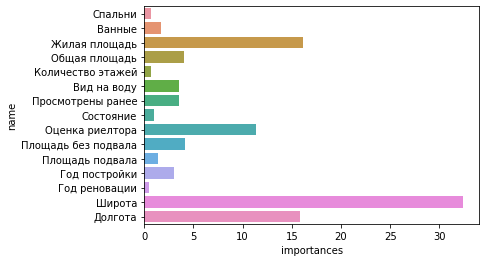

In [196]:
sns.barplot(x="importances", y="name", data= feature_imp)

# 2.Задания по подбору гиперпараметров моделей RandomForest, GBM, XGBoost, LightGBM и CatBoost

### Настройте гиперпараметры модели RandomForest так, чтобы снизилась ошибка MАE - 1 балл
### Настройте гиперпараметры модели GBM так, чтобы снизилась ошибка MАE - 1 балл
###Настройте гиперпараметры модели XGBoost так, чтобы снизилась ошибка MАE - 1 балл
### Настройте гиперпараметры модели LightGBM так, чтобы снизилась ошибка MАE - 1 балл
###Настройте гиперпараметры модели CatBoost так, чтобы снизилась ошибка MАE - 1 балл



## 1. RandomForest

In [52]:
import numpy as np

Обучим RandomForestRegressor без задания гиперпараметров, и получим значение ошибки случайного леса с гиперпараметрами по умолчанию.

In [102]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y_train)
prediction_train = forest.predict(X_train)
prediction_test = forest.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error

print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  26178.687987669535
MAE on test:   70361.44361200464


Эта функция перебирает значения гиперпараметра hyperparameter_name по списку hyperparameter_values и строит графики ошибки на обучающей и тестовой выборках. Кроме того, функция находит лучшее значение ошибки на тестовой выборке и соответствующее ему значение гиперпараметра.

In [73]:
def try_hyperparameter_values(regressor_class, regressor_params, hyperparameter_name, hyperparameter_values):
    train_mae_list = []
    test_mae_list = []

    best_hyperparameter_value = None
    best_test_mae = float('inf')

    for hyperparamteer_value in hyperparameter_values:
        d = {hyperparameter_name: hyperparamteer_value}
        model = regressor_class(**regressor_params, **d).fit(X_train, y_train)
        prediction_train = model.predict(X_train)
        prediction_test = model.predict(X_test)
        train_mae = mean_absolute_error(y_train, prediction_train)
        test_mae = mean_absolute_error(y_test, prediction_test)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)

        if test_mae < best_test_mae:
            best_test_mae = test_mae
            best_hyperparameter_value = hyperparamteer_value

    plt.plot(hyperparameter_values, train_mae_list, c='blue')
    plt.plot(hyperparameter_values, test_mae_list, c='red')
    print(f'Best MAE on test: {best_test_mae}')
    print(f'Best hyperparameter value: {best_hyperparameter_value}')

In [76]:
def range_closed(start, stop, step=1):
    return range(start, stop + step, step)

Эта функция запускает GridSearchCV и измеряет время его выполнения.

In [57]:
from datetime import datetime

def gridsearch(regressor_class, regressor_params, param_grid):
    start_time = datetime.now()

    cv = GridSearchCV(estimator=regressor_class(**regressor_params), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    cv.fit(X_train, y_train)

    print('Execution time:')
    print(datetime.now() - start_time)

    return cv

Применим функция try_hyperparameter_values к различным гиперпараметрам.

Best MAE on test: 70181.69956888568
Best hyperparameter value: 0.8


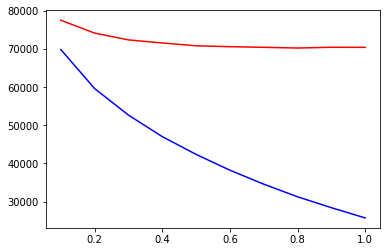

In [93]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200}, 'max_samples', np.linspace(0.1, 1, 10))

Best MAE on test: 70167.26117198012
Best hyperparameter value: 1.0


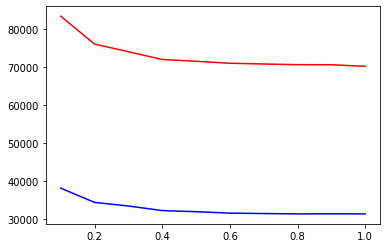

In [95]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200, 'max_samples': 0.8}, 'max_features', np.linspace(0.1, 1, 10))

Best MAE on test: 70357.5995397315
Best hyperparameter value: 1


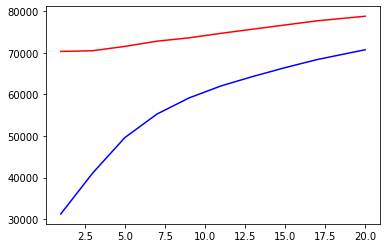

In [96]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200, 'max_samples': 0.8}, 'min_samples_leaf', np.linspace(1, 20, 10, dtype=int))

Best MAE on test: 70073.4618365739
Best hyperparameter value: 200


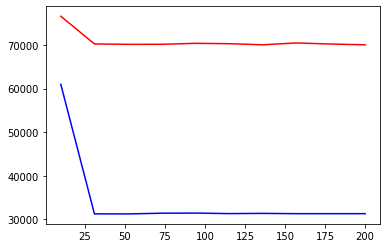

In [98]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200, 'max_samples': 0.8}, 'max_depth', np.linspace(10, 200, 10, dtype=int))

Best MAE on test: 70068.95535724035
Best hyperparameter value: 100


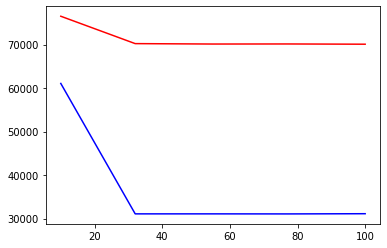

In [99]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 1000, 'max_samples': 0.8}, 'max_depth', np.linspace(10, 100, 5, dtype=int))

Best MAE on test: 69999.71373870403
Best hyperparameter value: 0.6666666666666666


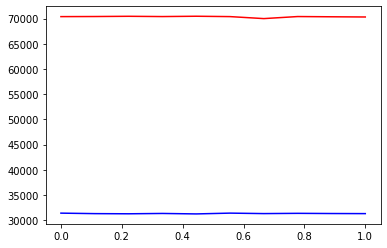

In [100]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200, 'max_samples': 0.8}, 'min_impurity_decrease', np.linspace(0, 1, 10))

Best MAE on test: 70138.16348332814
Best hyperparameter value: 3000


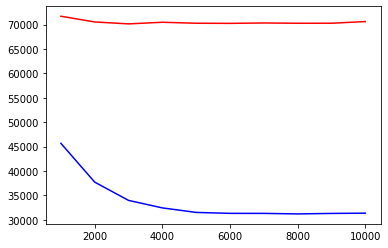

In [101]:
try_hyperparameter_values(RandomForestRegressor, {'n_estimators': 200, 'max_samples': 0.8}, 'max_leaf_nodes', np.linspace(1000, 10000, 10, dtype=int))

Обучим модель с найденными оптимальными гиперпараметрами.

В результате, качество модели удалось лишь немного улучишть.

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500, max_samples=0.8, max_leaf_nodes=3000, min_impurity_decrease=0.6666666666666666, 
                               n_jobs=-1, random_state=2)\
            .fit(X_train, y_train)
prediction_train = forest.predict(X_train)
prediction_test = forest.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  33857.81252509136
MAE on test:   70110.80229761916


## 2. GBM

Обучим GradientBoostingRegressor без задания гиперпараметров, и получим значение ошибки градиентного бустинга с гиперпараметрами по умолчанию.

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor().fit(X_train, y_train)
prediction_train = gbm.predict(X_train)
prediction_test = gbm.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  74239.4160296933
MAE on test:   80076.32796035956


Применим функция try_hyperparameter_values к различным гиперпараметрам.

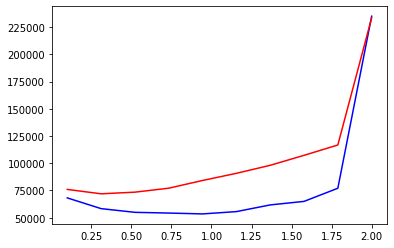

In [ ]:
try_hyperparameter_values(GradientBoostingRegressor, {'n_estimators': 200}, 'learning_rate', np.linspace(0.1, 2, 10))

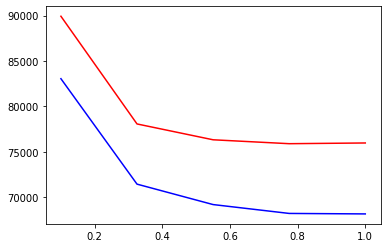

In [ ]:
try_hyperparameter_values(GradientBoostingRegressor, {'n_estimators': 200}, 'max_features', np.linspace(0.1, 1, 5))

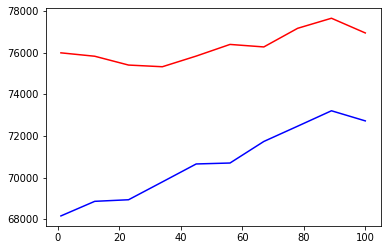

In [ ]:
try_hyperparameter_values(GradientBoostingRegressor, {'n_estimators': 200}, 'min_samples_leaf', np.linspace(1, 100, 10, dtype=int))

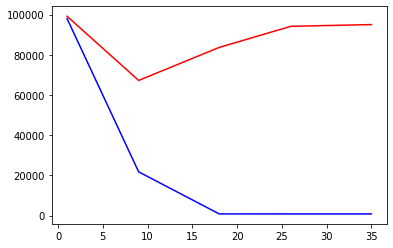

In [ ]:
try_hyperparameter_values(GradientBoostingRegressor, {'n_estimators': 200}, 'max_depth', np.linspace(1, 35, 5, dtype=int))

Будем искать оптимальные гиперпараметры с помощью кросс-валидации. Будем рассматривать интервалы гиперпараметров, в которых на графиках выше ошибка была минимальной.

In [ ]:
param_grid = {'learning_rate': np.linspace(0.1, 1, 4), 'max_features': np.linspace(0.3, 1, 4), 'min_samples_leaf': np.linspace(15, 45, 3, dtype=int), 'max_depth': [7, 8, 9]}

cv = gridsearch(GradientBoostingRegressor, {'n_estimators': 200}, param_grid)

Execution time:
0:32:21.267114


In [ ]:
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 0.3,
 'min_samples_leaf': 15}

In [ ]:
cv.best_score_

-68748.84668572557

Сузим рассматриваемые интервалы к значениям, найденным при кросс-валидации, и снова запустим кросс-валидацию.

In [ ]:
param_grid = {'learning_rate': np.linspace(0.01, 0.1, 3), 'max_features': np.linspace(0.4, 0.7, 3), 'min_samples_leaf': np.linspace(10, 20, 3, dtype=int), 'max_depth': [11, 12, 13, 14]}

cv = gridsearch(GradientBoostingRegressor, {'n_estimators': 200}, param_grid)

Execution time:
0:30:28.269331


In [ ]:
cv.best_params_

{'learning_rate': 0.05500000000000001,
 'max_depth': 11,
 'max_features': 0.55,
 'min_samples_leaf': 10}

In [ ]:
cv.best_score_

-67776.79199113527

Обучим модель с гиперпараметрами, найденными кросс-валидацией. Видно, что ошибка значительно уменьшилась.

In [92]:
gbm = GradientBoostingRegressor(n_estimators=500, learning_rate=0.055, max_depth=11, max_features=0.55, min_samples_leaf=10).fit(X_train, y_train)
prediction_train = gbm.predict(X_train)
prediction_test = gbm.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  30459.14884606763
MAE on test:   66782.35092248417


## XGBoost

Обучим XGBRegressor без задания гиперпараметров, и получим значение ошибки XGBoost с гиперпараметрами по умолчанию.

In [120]:
from xgboost import XGBRegressor

model = XGBRegressor(n_jobs=-1).fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

[13:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE on train:  75102.7214600271
MAE on test:   80424.20558538326


Применим функция try_hyperparameter_values к различным гиперпараметрам.

[14:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

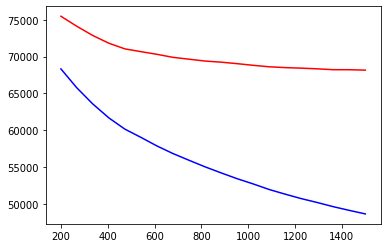

In [ ]:
try_hyperparameter_values(XGBRegressor, {}, 'n_estimators', np.linspace(200, 1500, 20, dtype=int))

[14:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


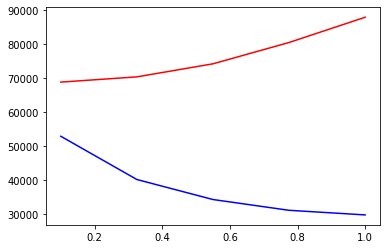

In [ ]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'learning_rate', np.linspace(0.1, 1, 5))

[13:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best MAE on test: 68997.45064413364
Best hyperparameter value: 10


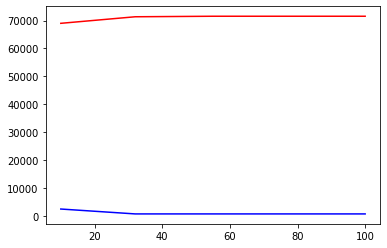

In [114]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'max_depth', np.linspace(10, 100, 5, dtype=int))

[13:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

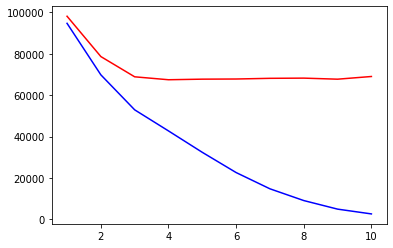

In [115]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'max_depth', np.linspace(1, 10, 10, dtype=int))

[15:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

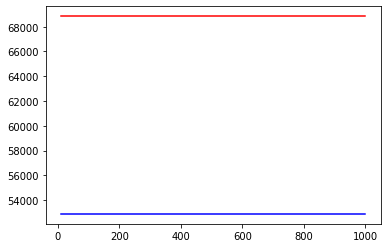

In [ ]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'max_leaves', np.linspace(10, 1000, 10, dtype=int))

[14:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


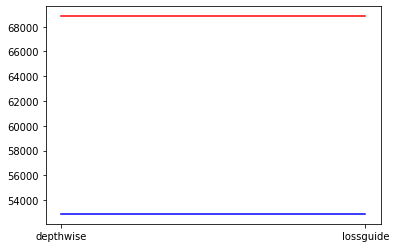

In [ ]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'grow_policy', ['depthwise', 'lossguide'])

[13:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best MAE on test: 68843.9855437423
Best hyperparameter value: gbtree


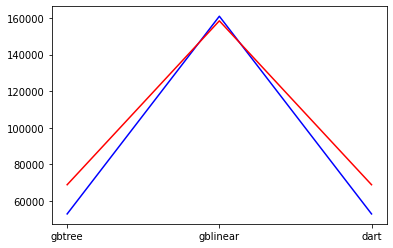

In [107]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'booster', ['gbtree', 'gblinear', 'dart'])

[15:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


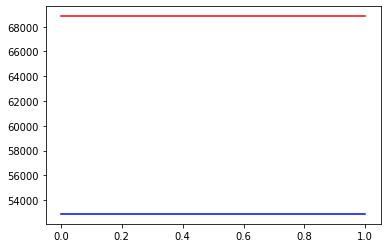

In [ ]:
try_hyperparameter_values(XGBRegressor, {'n_estimators': 1000}, 'gamma', np.linspace(0, 1, 5))

Будем искать оптимальные гиперпараметры с помощью кросс-валидации. Будем рассматривать интервалы гиперпараметров, в которых на графиках выше ошибка была минимальной.

In [116]:
param_grid = {'learning_rate': np.linspace(0.01, 0.2, 5), 'max_depth': [3, 4, 5]}

cv = gridsearch(XGBRegressor, {'n_estimators': 1000}, param_grid)

[13:50:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Execution time:
0:05:35.315914


In [117]:
cv.best_params_

{'learning_rate': 0.105, 'max_depth': 4}

In [118]:
cv.best_score_

-67558.76078433802

Обучим модель с найденными оптимальными гиперпараметрами.

В результате, качество модели улучшилось.

In [119]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.105, max_depth=4, n_jobs=-1).fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

[13:53:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE on train:  41930.07317951038
MAE on test:   68026.90001108497


## LightGBM

Обучим LGBMRegressor без задания гиперпараметров, и получим значение ошибки LightGBM с гиперпараметрами по умолчанию.

In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_jobs=-1).fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  55817.73363400691
MAE on test:   68253.84335179349


Применим функция try_hyperparameter_values к различным гиперпараметрам.

Видно, что boosting_type='goss' почему-то дает бесконечно большую ошибку, так что для наглядности построим график еще раз, исключив его из рассмотрения

Best MAE on test: 64060.43015030467
Best hyperparameter value: dart


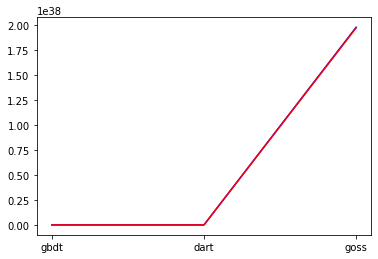

In [106]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000}, 'boosting_type', ['gbdt', 'dart', 'goss'])

Видно, что dart дает лучшие результаты, чем установленный по умолчанию gdbt, так что далее будем использовать именно его.

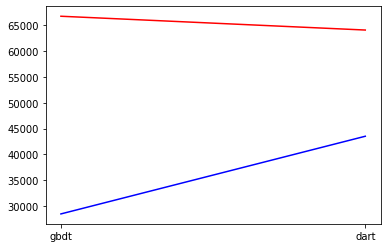

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000}, 'boosting_type', ['gbdt', 'dart'])

Есть еще один вариант boosting_type: rf. Он требует задания дополнительных гиперпараметров, поэтому рассмотрим его отдельно.

Выяснилось, что этот метод в нашем случае дает большое значение ошибки.

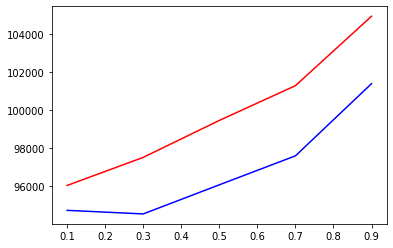

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000, 'boosting_type': 'rf', 'bagging_freq': 1}, 'bagging_fraction', np.linspace(0.1, 0.9, 5))

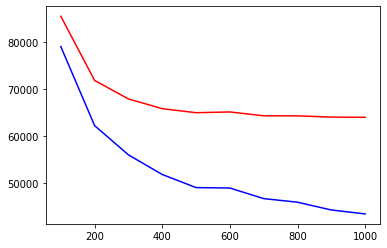

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'boosting_type': 'dart'}, 'n_estimators', np.linspace(100, 1000, 10, dtype=int))

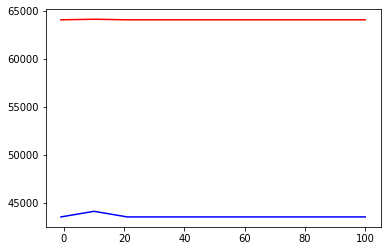

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000, 'boosting_type': 'dart'}, 'max_depth', np.linspace(-1, 100, 10, dtype=int))

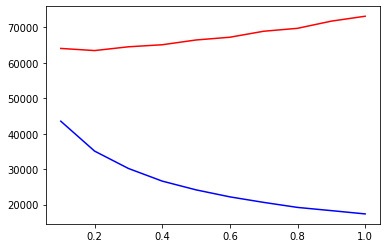

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000, 'boosting_type': 'dart'}, 'learning_rate', np.linspace(0.1, 1, 10))

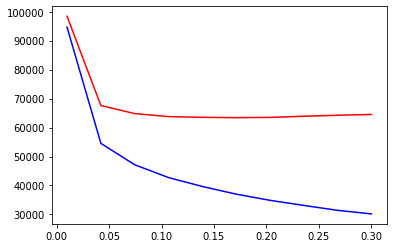

In [ ]:
try_hyperparameter_values(LGBMRegressor, {'n_estimators': 1000, 'boosting_type': 'dart'}, 'learning_rate', np.linspace(0.01, 0.3, 10))

Обучим модель с найденными оптимальными гиперпараметрами.

В результате, качество модели значительно улучшилось. Полученная модель по качеству уступает только CatBoost с настроенными гиперапраметрами.

In [104]:
model = LGBMRegressor(n_estimators=1000, boosting_type='dart', learning_rate=0.15, n_jobs=-1).fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

MAE on train:  38667.7715848227
MAE on test:   63835.19858859107


## CatBoost

Обучим CatBoostRegressor без задания гиперпараметров, и получим значение ошибки CatBoost с гиперпараметрами по умолчанию.

CatBoostRegressor показал очень хорошие результаты в сравнении с большинством других моделей даже с гиперпараметрами по умолчанию.

In [105]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor().fit(X_train, y_train)
prediction_train = cat.predict(X_train)
prediction_test = cat.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

Learning rate set to 0.062891
0:	learn: 356308.8195711	total: 6.2ms	remaining: 6.2s
1:	learn: 342673.4867490	total: 10.5ms	remaining: 5.25s
2:	learn: 330430.0615201	total: 14.7ms	remaining: 4.9s
3:	learn: 318827.3888323	total: 19ms	remaining: 4.74s
4:	learn: 307614.6773384	total: 25.5ms	remaining: 5.07s
5:	learn: 296822.6686705	total: 30.4ms	remaining: 5.03s
6:	learn: 286779.7419965	total: 35.2ms	remaining: 4.99s
7:	learn: 277356.1926531	total: 39.8ms	remaining: 4.94s
8:	learn: 268609.3611463	total: 44.5ms	remaining: 4.9s
9:	learn: 260638.5177059	total: 49.1ms	remaining: 4.86s
10:	learn: 252825.9604062	total: 53.7ms	remaining: 4.82s
11:	learn: 245646.3498400	total: 58.3ms	remaining: 4.8s
12:	learn: 238531.9202966	total: 63.4ms	remaining: 4.81s
13:	learn: 232118.6690309	total: 68.5ms	remaining: 4.82s
14:	learn: 225949.8096973	total: 73.4ms	remaining: 4.82s
15:	learn: 220490.0335290	total: 78ms	remaining: 4.8s
16:	learn: 215775.8327333	total: 82.9ms	remaining: 4.79s
17:	learn: 210813.263

Получим learning_rate, автоматически определенный моделью. Далее попробуем найти в его окрестностях еще более оптимальное значение learning_rate.

In [66]:
cat.learning_rate_

0.06289099901914597

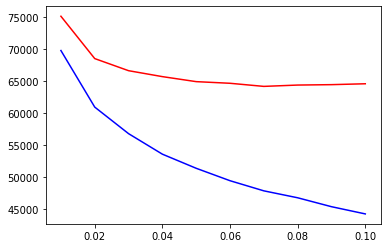

In [70]:
try_hyperparameter_values(CatBoostRegressor, {'silent': True}, 'learning_rate', np.linspace(0.01, 0.1, 10))

Best MAE on test: 64209.65908171331
Best hyperparameter value: 0.09333333333333334


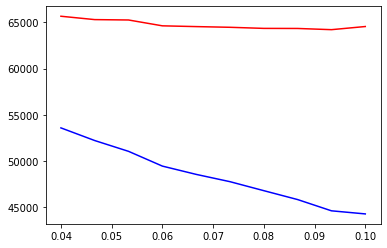

In [74]:
try_hyperparameter_values(CatBoostRegressor, {'silent': True}, 'learning_rate', np.linspace(0.04, 0.1, 10))

Best MAE on test: 63359.355985880036
Best hyperparameter value: 7


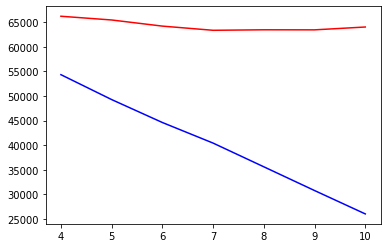

In [81]:
try_hyperparameter_values(CatBoostRegressor, {'learning_rate': 0.09333333333333334, 'silent': True}, 'depth', range_closed(4, 10))

Рассмотрим ряд других гиперпараметров.

Best MAE on test: 63364.71614056345
Best hyperparameter value: 5.0


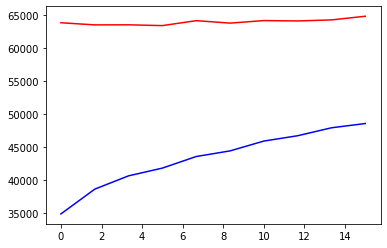

In [84]:
try_hyperparameter_values(CatBoostRegressor, {'learning_rate': 0.09333333333333334, 'depth': 7, 'silent': True}, 'l2_leaf_reg', np.linspace(0, 15, 10))

Best MAE on test: 63215.68190224484
Best hyperparameter value: 13.333333333333334


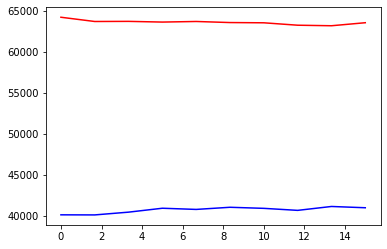

In [85]:
try_hyperparameter_values(CatBoostRegressor, {'learning_rate': 0.09333333333333334, 'depth': 7, 'silent': True}, 'random_strength', np.linspace(0, 15, 10))

Best MAE on test: 63215.68190224484
Best hyperparameter value: 13.333333333333334


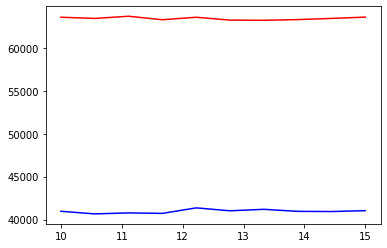

In [86]:
try_hyperparameter_values(CatBoostRegressor, {'learning_rate': 0.09333333333333334, 'depth': 7, 'silent': True}, 'random_strength', np.linspace(10, 15, 10))

Обучим модель с найденными оптимальными гиперпараметрами.

В результате, качество модели несколько улучшилось. Полученная модель – лучшая из всех рассмотренных в этом задании.

In [87]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(learning_rate=0.09333333333333334, depth=7, random_strength=13.333333333333334).fit(X_train, y_train)
prediction_train = cat.predict(X_train)
prediction_test = cat.predict(X_test)
print('MAE on train: ', mean_absolute_error(y_train, prediction_train))
print('MAE on test:  ', mean_absolute_error(y_test, prediction_test))

0:	learn: 353728.0359349	total: 8.25ms	remaining: 8.24s
1:	learn: 336433.6382691	total: 14.9ms	remaining: 7.41s
2:	learn: 320038.8646715	total: 26.5ms	remaining: 8.8s
3:	learn: 307069.0731968	total: 33.9ms	remaining: 8.45s
4:	learn: 292489.1967073	total: 40.5ms	remaining: 8.06s
5:	learn: 282908.3067683	total: 48.1ms	remaining: 7.97s
6:	learn: 274685.7727370	total: 56.5ms	remaining: 8.02s
7:	learn: 264334.7827719	total: 63.8ms	remaining: 7.92s
8:	learn: 257152.0455373	total: 70.1ms	remaining: 7.72s
9:	learn: 248944.2184410	total: 77.8ms	remaining: 7.7s
10:	learn: 242155.9378507	total: 85.3ms	remaining: 7.67s
11:	learn: 236827.8205863	total: 93.1ms	remaining: 7.67s
12:	learn: 229665.8477703	total: 102ms	remaining: 7.71s
13:	learn: 224827.1314126	total: 107ms	remaining: 7.57s
14:	learn: 219327.9189008	total: 123ms	remaining: 8.11s
15:	learn: 214215.6445222	total: 144ms	remaining: 8.85s
16:	learn: 209676.3813950	total: 166ms	remaining: 9.57s
17:	learn: 207368.7184182	total: 185ms	remaining